In [46]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [47]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [48]:
NUM_CLASSES = 2

# Dataset reading

In [49]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2 * 2) + 1)))

In [50]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [52]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [53]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_4 (Dropout)         (None, 84)                0         
                                                                 
 dense_6 (Dense)             (None, 20)                1700      
                                                                 
 dropout_5 (Dropout)         (None, 20)                0         
                                                                 
 dense_7 (Dense)             (None, 10)                210       
                                                                 
 dense_8 (Dense)             (None, 2)                 22        
                                                                 
Total params: 1932 (7.55 KB)
Trainable params: 1932 (7.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [55]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [56]:
model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/100
1/2 [==============>...............] - ETA: 1s - loss: 0.6976 - accuracy: 0.4688
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 2s 552ms/step - loss: 0.6891 - accuracy: 0.4800 - val_loss: 0.5317 - val_accuracy: 0.6078
Epoch 2/100
1/2 [==============>...............] - ETA: 0s - loss: 0.6676 - accuracy: 0.5078
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5


C:\Users\Sanjay\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 151ms/step - loss: 0.6625 - accuracy: 0.5267 - val_loss: 0.5032 - val_accuracy: 0.6078
Epoch 3/100
1/2 [==============>...............] - ETA: 0s - loss: 0.6252 - accuracy: 0.5547
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 149ms/step - loss: 0.6178 - accuracy: 0.5533 - val_loss: 0.4761 - val_accuracy: 0.6275
Epoch 4/100
1/2 [==============>...............] - ETA: 0s - loss: 0.6106 - accuracy: 0.5859
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 157ms/step - loss: 0.6055 - accuracy: 0.6000 - val_loss: 0.4495 - val_accuracy: 0.6667
Epoch 5/100
1/2 [==============>...............] - ETA: 0s - loss: 0.5611 - accuracy: 0.6562
Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 138ms/step - loss: 0.5530 - accuracy: 0.6600 - val_loss: 0.4244 

Epoch 30/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1468 - accuracy: 0.9688
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 144ms/step - loss: 0.1421 - accuracy: 0.9733 - val_loss: 0.0446 - val_accuracy: 1.0000
Epoch 31/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1427 - accuracy: 0.9844
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 138ms/step - loss: 0.1489 - accuracy: 0.9800 - val_loss: 0.0396 - val_accuracy: 1.0000
Epoch 32/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1334 - accuracy: 0.9766
Epoch 32: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 152ms/step - loss: 0.1278 - accuracy: 0.9800 - val_loss: 0.0354 - val_accuracy: 1.0000
Epoch 33/100
1/2 [==============>...............] - ETA: 0s - loss: 0.0983 - accuracy: 0.9922
Epoch 

1/2 [==============>...............] - ETA: 0s - loss: 0.0193 - accuracy: 1.0000
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 152ms/step - loss: 0.0212 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 58/100
1/2 [==============>...............] - ETA: 0s - loss: 0.0351 - accuracy: 1.0000
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 178ms/step - loss: 0.0353 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 59/100
1/2 [==============>...............] - ETA: 0s - loss: 0.0332 - accuracy: 0.9922
Epoch 59: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 145ms/step - loss: 0.0338 - accuracy: 0.9933 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 60/100
1/2 [==============>...............] - ETA: 0s - loss: 0.0276 - accuracy: 1.0000
Epoch 60: saving mo

2/2 [==============================] - 0s 145ms/step - loss: 0.0276 - accuracy: 0.9933 - val_loss: 9.1184e-04 - val_accuracy: 1.0000
Epoch 85/100
1/2 [==============>...............] - ETA: 0s - loss: 0.0297 - accuracy: 0.9844
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 148ms/step - loss: 0.0271 - accuracy: 0.9867 - val_loss: 8.6488e-04 - val_accuracy: 1.0000
Epoch 86/100
1/2 [==============>...............] - ETA: 0s - loss: 0.0302 - accuracy: 0.9922
Epoch 86: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 144ms/step - loss: 0.0292 - accuracy: 0.9933 - val_loss: 8.2323e-04 - val_accuracy: 1.0000
Epoch 87/100
1/2 [==============>...............] - ETA: 0s - loss: 0.0236 - accuracy: 0.9922
Epoch 87: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 142ms/step - loss: 0.0212 - accuracy: 0.9933 -

In [57]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

1/1 [==============================] - 0s 62ms/step - loss: 5.2817e-04 - accuracy: 1.0000


In [58]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [59]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 168ms/step
[8.2724349e-05 9.9991727e-01]
1


# Confusion matrix

2/2 [==============================] - 0s 3ms/step


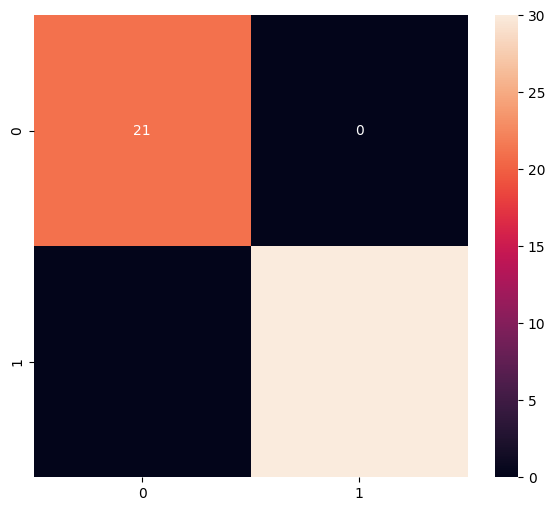

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        30

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [61]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

C:\Users\Sanjay\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [62]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Sanjay\AppData\Local\Temp\tmpgxgb36ga\assets


INFO:tensorflow:Assets written to: C:\Users\Sanjay\AppData\Local\Temp\tmpgxgb36ga\assets


4904

# Inference test

In [63]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [64]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [65]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [66]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [67]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[8.2944578e-05 9.9991703e-01]
1
